#　データの確認と証明

In [2]:
"""
module load gcc/8.3.0 cuda openmpi
!python3 -m pip install --user horovod
!python3 -m pip install --user PyYAML
!python3 -m pip install --user attrdict
!python3 -m pip install --user filelock
!python3 -m pip install --user torchvision"""

'!python3 -m pip install --user PyYAML\n!python3 -m pip install --user attrdict'

## import ライブラリー

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from scipy.stats import pearsonr

## Data定義

In [2]:
%%time
#6分ぐらいかかる
df_aal = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_aal.csv')
df_ho = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_ho.csv')

#df_dynamic_aal = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_aal.csv')
#df_dynamic_ho = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_ho.csv')

df_subjects_info = pd.read_csv('../02_data_analysis/subjects_info/subjects_info.csv')

CPU times: user 3.3 s, sys: 148 ms, total: 3.45 s
Wall time: 3.59 s


### 時系列データ可視化

<AxesSubplot:>

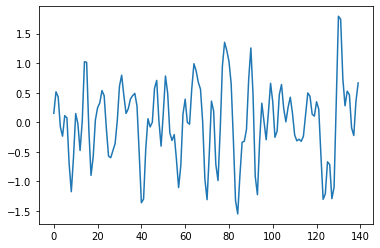

In [3]:
df_aal[df_aal['subID'] == 'D2910']['Precentral_L'].plot()

### 年齢分布可視化

<AxesSubplot:>

count    615.000000
mean      62.391870
std       13.469749
min       33.000000
25%       52.000000
50%       65.000000
75%       74.000000
max       89.000000
Name: Age, dtype: float64

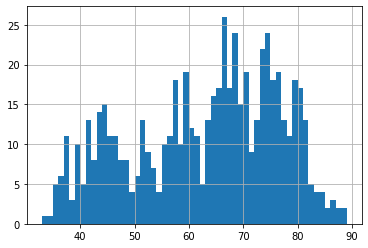

In [6]:
df_subjects_info.Age.hist(bins=89-33)
df_subjects_info.Age.describe()

### 男女比

<AxesSubplot:>

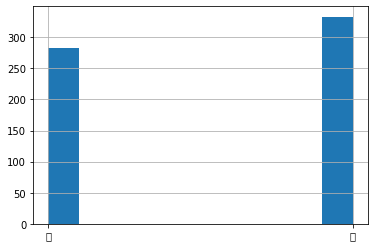

In [193]:
df_subjects_info.Sex.hist()

## 証明

### 加わるノイズと定義域の関係
加わるノイズが同じでも定義域が大きくなればその効果が薄まることの証明\
年齢予測において、年齢のレンジが大きいことによって、相関は必ず小さく評価される

0.991625266123836
0.0


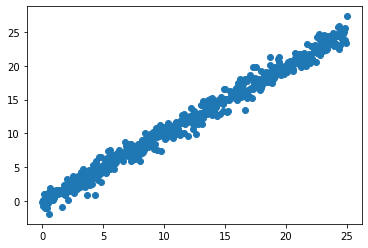

In [207]:
x = np.linspace(0, 25, 500)
y = x + np.random.randn(500)
corr,p = pearsonr(x,y)
print(corr)
print(p)
plt.scatter(x,y)

0.5306342622996387
1.1626372221078986e-37


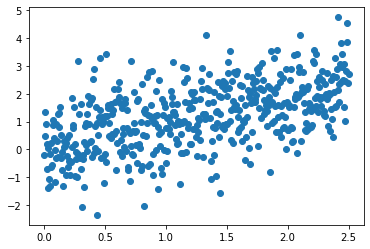

In [208]:
x = np.linspace(0, 2.5, 500)
y = x + np.random.randn(500)
corr,p = pearsonr(x,y)
print(corr)
print(p)
plt.scatter(x,y)

### 逆変換と傾き
逆変換しても傾きが-1倍になるわけではない事の証明

LinearRegression()

<Figure size 480x480 with 0 Axes>

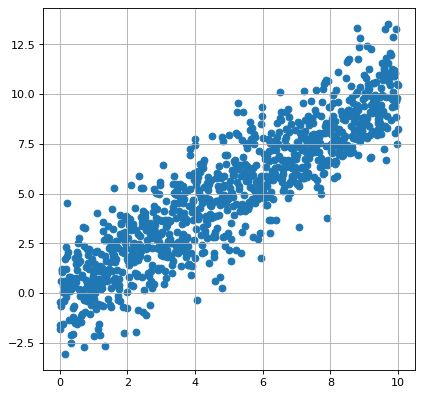

r^2 train data:  0.733292201351261
切片:  -0.1677017768333462
傾き:  1.0382958582857367


In [217]:
from sklearn.linear_model import LinearRegression
x = np.linspace(0, 10, 1000)
y = x + 1.5 * np.random.randn(1000)

lr = LinearRegression()
lr.fit(np.array([x]).T,y)

plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(x,y)
plt.grid()                     # グリッド線を表示
plt.show()                     # 図の表示

print('r^2 train data: ', r2_score(x,y))
print('切片: ', lr.intercept_)
print('傾き: ', lr.coef_[0])

LinearRegression()

<Figure size 480x480 with 0 Axes>

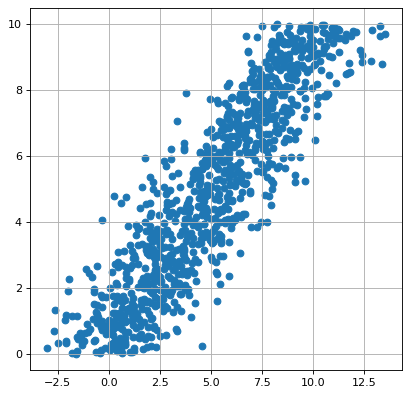

切片:  1.1167034895269143
傾き:  0.7729833773870624


In [218]:
lr = LinearRegression()
lr.fit(np.array([y]).T,x)

plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(y,x)
plt.grid()                     # グリッド線を表示
plt.show()                     # 図の表示

print('切片: ', lr.intercept_)
print('傾き: ', lr.coef_[0])

### データの引き算と相関係数
相関係数が正に大きいデータから相関係数が正に小さいデータを引いた時、必ず相関係数が負になるわけではないこのと証明

0.12115787390406094
0.000122677412935383


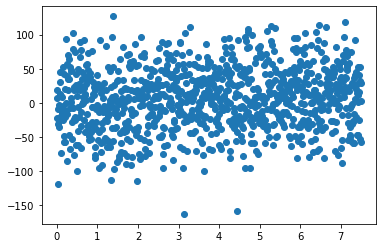

0.09484142342507272
0.002680646699702005


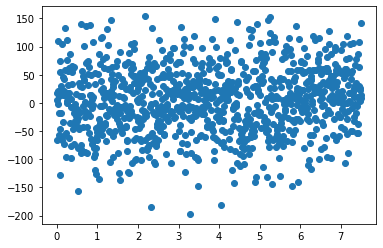

0.0023723262920243757
0.9402737318065835


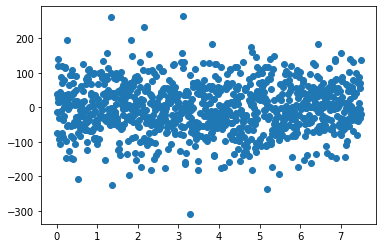

In [221]:
np.random.seed(4861)
x = np.linspace(0, 7.5, 1000)
y = x + 45 * np.random.randn(1000)
corr,p = pearsonr(x,y)
print(corr)
print(p)
plt.scatter(x,y)
plt.show()

y_ = x + 15 * np.random.randn(1000)
y_ = y_ + 55 * np.random.randn(1000) 
corr,p = pearsonr(x,y_)
print(corr)
print(p)
plt.scatter(x,y_)
plt.show()

corr,p = pearsonr(x,y_-y)
print(corr)
print(p)
plt.scatter(x,y_-y)
plt.show()

## 先生への提出

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_subjects_info = pd.read_csv('../02_data_analysis/subjects_info/subjects_info.csv')
def pred_mean(preds):
    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
    return pred[:,0]

df_subjects_info['pred'] = pred_mean(test_pred_aal_1)*age_std+age_mean
df_subjects_info['pred_correction'] = pred_mean(test_pred_aal_inverse_1)*age_std+age_mean

df_subjects_info['error'] = pred_mean(test_pred_aal_inverse_1)*age_std+age_mean\
                          - np.array(df_subjects_info['Age'])

pearsonr(np.array(df_subjects_info['error']),
         np.array(df_subjects_info['やる気スコア(Apathy scale)']))

pearsonr(np.array(df_subjects_info['pred_correction']),
         np.array(df_subjects_info['やる気スコア(Apathy scale)']))

pearsonr(np.array(df_subjects_info['Age']),
         np.array(df_subjects_info['やる気スコア(Apathy scale)']))

#df_subjects_info.to_csv('/gs/hs0/tga-akamalab/minowa/subjects_info2.csv')

plt.scatter(np.array(df_subjects_info['Age']),
            np.array(df_subjects_info['pred'] - df_subjects_info['Age'])
           )
plt.show()
df_thr5=df_subjects_info[np.abs(df_subjects_info['pred'] - df_subjects_info['Age']) > 5]
print(len(df_thr5))
pearsonr(np.array(df_thr5['error']),
         np.array(df_thr5['やる気スコア(Apathy scale)']))

plt.scatter(np.array(df_thr5['error']), np.array(df_thr5['やる気スコア(Apathy scale)']))
plt.show()

df_thr5=df_subjects_info[np.abs(df_subjects_info['pred_correction'] - df_subjects_info['Age']) > 5]
print(len(df_thr5))
pearsonr(np.array(df_thr5['error']),
         np.array(df_thr5['やる気スコア(Apathy scale)']))

plt.scatter(np.array(df_thr5['error']), np.array(df_thr5['やる気スコア(Apathy scale)']))
plt.show()

df_thr5=df_subjects_info[np.abs(df_subjects_info['pred_correction'] - df_subjects_info['Age']) >= 0]
print(len(df_thr5))
pearsonr(np.array(df_thr5['error']),
         np.array(df_thr5['やる気スコア(Apathy scale)']))

plt.scatter(np.array(df_thr5['error']), np.array(df_thr5['やる気スコア(Apathy scale)']))
plt.show()

NameError: name 'test_pred_aal_inverse_1' is not defined